In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor as tree
import tqdm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kieranpoc/steam-reviews")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 16.1G/16.1G [09:58<00:00, 28.8MB/s]

Extracting files...


Path to dataset files: /home/abuzmander/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2


In [25]:
df = pd.read_csv("/home/abuzmander/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2/weighted_score_above_08.csv", low_memory=False)

In [26]:
df.head()

,recommendationid,appid,game,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,147449116,10,Counter-Strike,76561199183984450,51,12,2548,0,2480,1696305457,...,1,99,2,0.889438,0,1,0,0,1,NaN
1,147374264,10,Counter-Strike,76561198099573060,226,13,2369,0,2361,1696096555,...,1,122,8,0.914834,0,1,0,0,1,NaN
2,147357703,10,Counter-Strike,76561199080026894,118,23,13501,212,12957,1697630734,...,1,599,20,0.968375,3,1,0,0,1,NaN
3,147345102,10,Counter-Strike,76561198068970227,28,1,10668,640,9906,1698261011,...,1,59,12,0.826206,0,0,0,0,1,NaN
4,147284743,10,Counter-Strike,76561199137893460,19,5,543,10,526,1697810991,...,1,128,24,0.853612,0,1,0,0,1,NaN


In [27]:
# Cycles through all of the columns checking for the number of Nan Values
for i in df.columns:
    print(i)
    print(df[i].isna().sum())

recommendationid
0
appid
0
game
33
author_steamid
0
author_num_games_owned
0
author_num_reviews
0
author_playtime_forever
0
author_playtime_last_two_weeks
0
author_playtime_at_review
0
author_last_played
0
language
0
review
0
timestamp_created
0
timestamp_updated
0
voted_up
0
votes_up
0
votes_funny
0
weighted_vote_score
0
comment_count
0
steam_purchase
0
received_for_free
0
written_during_early_access
0
hidden_in_steam_china
0
steam_china_location
498072


In [28]:
len(df)

498094

In [29]:
# Drops the rows in game which have Nan values
df = df.dropna(subset=["game"])
# Drop unessesary columns
df = df.drop(['author_playtime_forever',
             'language', 'review', 'timestamp_created', 'timestamp_updated', 'votes_up', 
              'steam_purchase', "steam_china_location"], axis = 1)

In [30]:
df.columns

Index(['recommendationid', 'appid', 'game', 'author_steamid',
       'author_num_games_owned', 'author_num_reviews',
       'author_playtime_last_two_weeks', 'author_playtime_at_review',
       'author_last_played', 'voted_up', 'votes_funny', 'weighted_vote_score',
       'comment_count', 'received_for_free', 'written_during_early_access',
       'hidden_in_steam_china'],
      dtype='object')

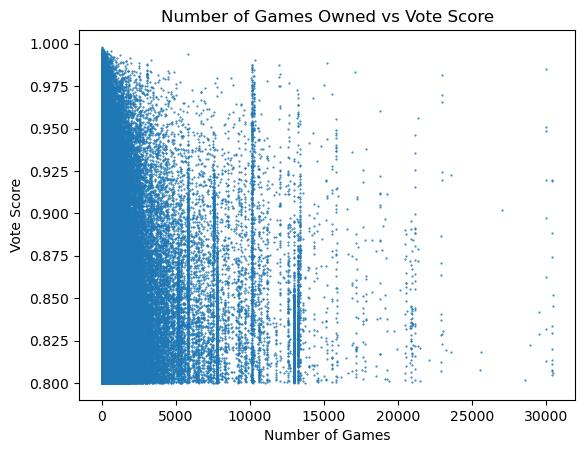

In [170]:
plt.plot(df['author_num_games_owned'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Games Owned vs Vote Score')
plt.xlabel('Number of Games')
plt.ylabel('Vote Score')
plt.savefig('Numgames.png')
plt.show()


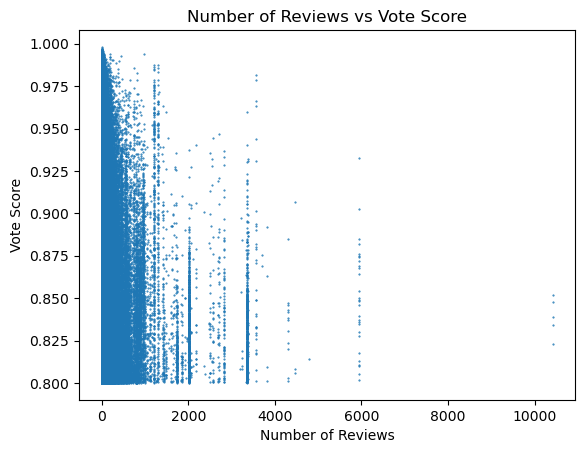

In [171]:
plt.plot(df['author_num_reviews'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Reviews vs Vote Score')
plt.xlabel('Number of Reviews')
plt.ylabel('Vote Score')
plt.savefig('Numreviews')
plt.show()


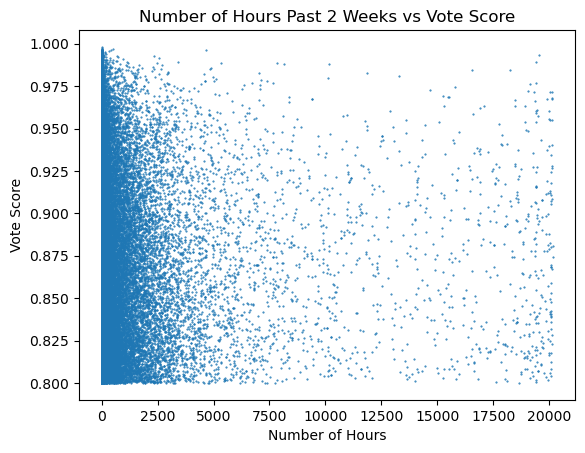

In [172]:
plt.plot(df['author_playtime_last_two_weeks'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Hours Past 2 Weeks vs Vote Score')
plt.xlabel('Number of Hours')
plt.ylabel('Vote Score')
plt.savefig('2 Weeks')
plt.show()

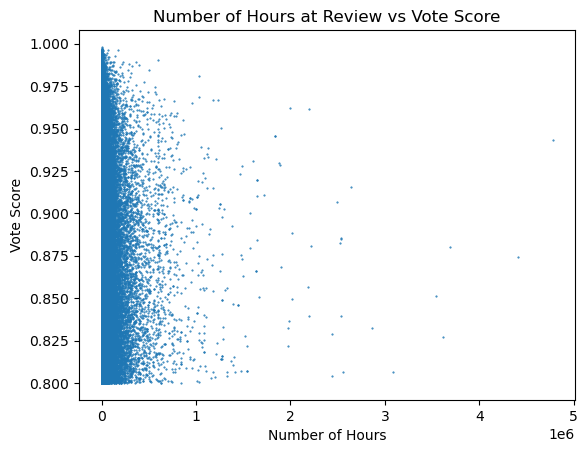

In [173]:
plt.plot(df['author_playtime_at_review'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Hours at Review vs Vote Score')
plt.xlabel('Number of Hours')
plt.ylabel('Vote Score')
plt.savefig('num at review')
plt.show()

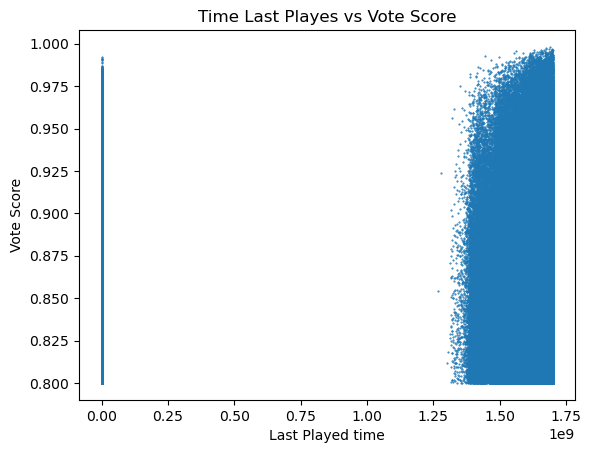

In [174]:
plt.plot(df['author_last_played'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Time Last Playes vs Vote Score')
plt.xlabel('Last Played time')
plt.ylabel('Vote Score')
plt.savefig('Time last played')
plt.show()

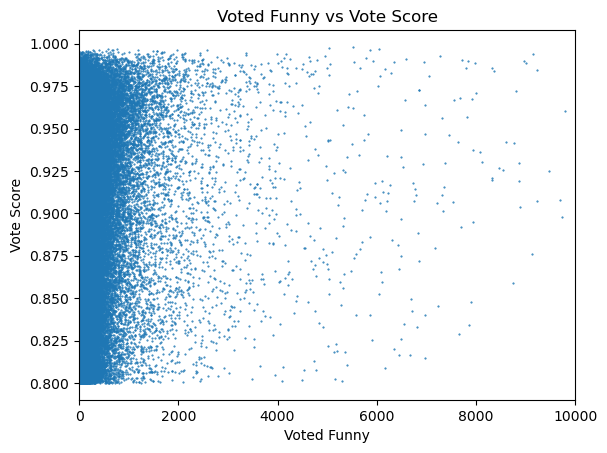

In [175]:
plt.plot(df['votes_funny'],df['weighted_vote_score'], '.', markersize = 1)
plt.xlim([0,10000])
plt.title('Voted Funny vs Vote Score')
plt.xlabel('Voted Funny')
plt.ylabel('Vote Score')
plt.savefig('funny')
plt.show()

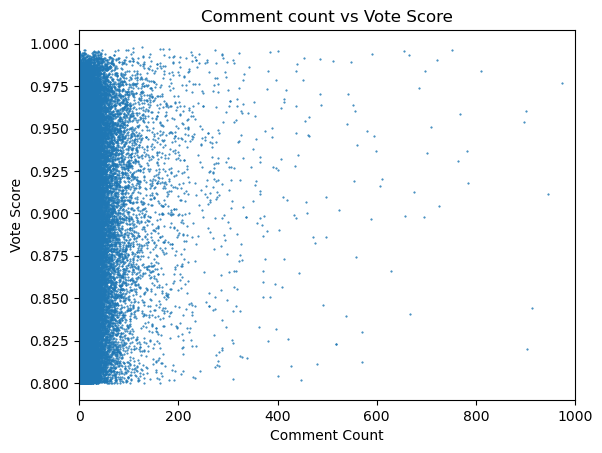

In [176]:
plt.plot(df['comment_count'],df['weighted_vote_score'], '.', markersize = 1)
plt.xlim([0,1000])
plt.title('Comment count vs Vote Score')
plt.xlabel('Comment Count')
plt.ylabel('Vote Score')
plt.savefig('comments')
plt.show()

In [128]:
# Drops the weighted vote score since that is our solution and our game (since it is contained in game id)
X = df.drop(['weighted_vote_score', 'game'], axis = 1)
y = df['weighted_vote_score']
# Creates our test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
regressor = linr()

In [129]:
regressor.fit(X_train, y_train)

LinearRegression()

In [130]:
# Finds the score of our trained data
regressor.score(X_train, y_train)

0.03387721168090496

In [131]:
# Finds the score of our test data
regressor.score(X_test, y_test)

0.032285364941259775

In [141]:
tot_score = 0
max_score = -1 * np.inf
min_score = np.inf
# Trying to find our average score
for i in range(1000):
    # Drops the weighted vote score since that is our solution and our game (since it is contained in game id)
    X = df.drop(['weighted_vote_score', 'game'], axis = 1)
    y = df['weighted_vote_score']
    # Creates our test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    regressor = linr()
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    tot_score += score
    if max_score < score:
        max_score = score
    if min_score > score:
        min_score = score

In [142]:
# Shows our mean, max and min scores
mean_tot_score = 1/1000* tot_score
print(mean_tot_score)
print(max_score)
print(min_score)

-10627283.351654487
0.037622575892428345
-117516437.22122763


In [119]:
# Params to grid search over
param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [1,  3, 5, 10],
    'splitter': ['best', 'random']
}

In [84]:
# Creates our tree regression
treer = tree()

In [97]:
# Searches for the best parameters
grid = GridSearchCV(treer, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

# Prints the best parameters
print("Best params:", grid.best_params_)
best = grid.best_estimator_

Best params: {'criterion': 'squared_error', 'max_depth': 10, 'splitter': 'best'}


In [102]:
tree2 = tree(criterion='squared_error', max_depth=10, splitter='best')
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [103]:
best = grid.best_estimator_

In [104]:
# Shows the ecaluation on the test set
y_pred = tree2.predict(X_test)
print("MSE:", np.mean((y_test- y_pred)**2))

MSE: 0.0016606584778031434


In [106]:
# Shows the feature importance of each feature
tree2.feature_importances_

array([1.24080438e-01, 2.41590555e-02, 0.00000000e+00, 9.36488188e-03,
       2.77303630e-02, 1.44511861e-03, 1.22686463e-02, 1.14764651e-02,
       2.55043223e-02, 6.54197103e-01, 1.08550223e-01, 7.61973395e-04,
       4.18406482e-04, 4.30026564e-05])

In [140]:
# Shows our features
X.columns

Index(['recommendationid', 'appid', 'author_steamid', 'author_num_games_owned',
       'author_num_reviews', 'author_playtime_last_two_weeks',
       'author_playtime_at_review', 'author_last_played', 'voted_up',
       'votes_funny', 'comment_count', 'received_for_free',
       'written_during_early_access', 'hidden_in_steam_china'],
      dtype='object')

In [143]:
# Makes a dictionary of our features and thier importance
my_dict = {X.columns[i]: tree2.feature_importances_[i] for i in range(len(tree2.feature_importances_))}

In [144]:
# Sorts our dictionary
{k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1])}

{'author_steamid': 0.0,
 'hidden_in_steam_china': 4.3002656367236915e-05,
 'written_during_early_access': 0.00041840648151294103,
 'received_for_free': 0.0007619733947244545,
 'author_playtime_last_two_weeks': 0.0014451186124826354,
 'author_num_games_owned': 0.009364881882716279,
 'author_last_played': 0.011476465079212508,
 'author_playtime_at_review': 0.01226864628660263,
 'appid': 0.024159055543840527,
 'voted_up': 0.025504322282344092,
 'author_num_reviews': 0.027730363029840634,
 'comment_count': 0.10855022318612795,
 'recommendationid': 0.1240804383820948,
 'votes_funny': 0.6541971031821333}